<a href="https://colab.research.google.com/github/Arjun270/Data-Analysis/blob/main/food_preferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('https://raw.githubusercontent.com/vjvijayashree/food_preferences/master/Food_Preference.csv')
data.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            4
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

In [ ]:
data

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [ ]:
maj=data['Gender'].mode()
data['Gender'].replace(np.nan,maj[0],inplace=True)
data.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            0
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

# Total no of people who participated in survey based on nationality

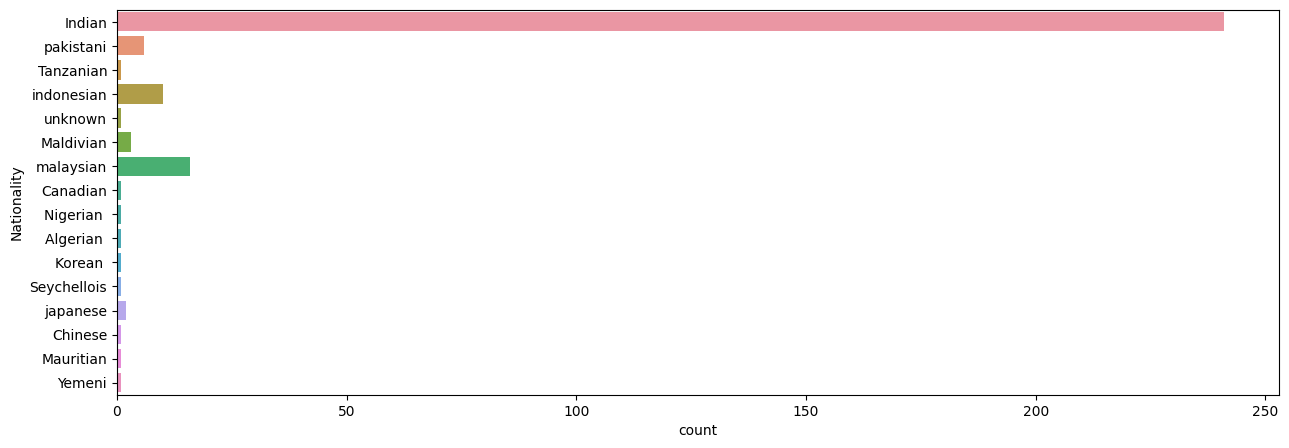

In [ ]:
data['Nationality'] = data['Nationality'].replace(['Pakistani ', 'Pakistan','Pakistani'], 'pakistani')

data['Nationality'] = data['Nationality'].replace(['Indonesia', 'Indonesian ','Indonesain','Indonesain','Indonesian'], 'indonesian')
data['Nationality'] = data['Nationality'].replace(['Muslim'], 'unknown')
data['Nationality'] = data['Nationality'].replace(['Maldivian ', 'Maldivian'], 'Maldivian')
data['Nationality'] = data['Nationality'].replace(['MY', 'Malaysian','Malaysian ','MALAYSIAN','Malaysia ','Malaysia'], 'malaysian')
data['Nationality'] = data['Nationality'].replace(['Japan'], 'japanese')
data['Nationality'] =data['Nationality'].replace(['China'], 'Chinese')
data['Nationality'] = data['Nationality'].replace(['Yemen'], 'Yemeni')
plt.subplots(figsize=(15,5))
sns.countplot(y='Nationality',data = data)
plt.show()

# Male and Female count on Taking Survey

Female    169
Male      119
Name: Gender, dtype: int64


<Axes: title={'center': 'Gender'}>

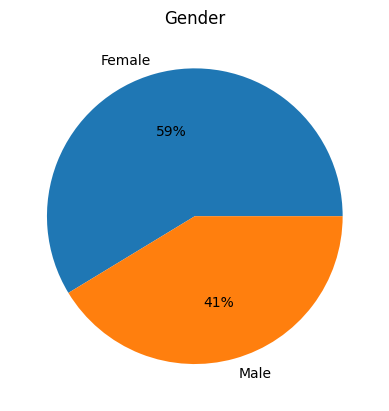

In [ ]:
mfc=data['Gender'].value_counts()
print(mfc)
mfc.plot(kind='pie',ylabel='',title='Gender',autopct='%1.0f%%')

# Male and female Preference on Types of Foods

<Axes: title={'center': 'Food Perferences'}, xlabel='Gender', ylabel='No of Persons'>

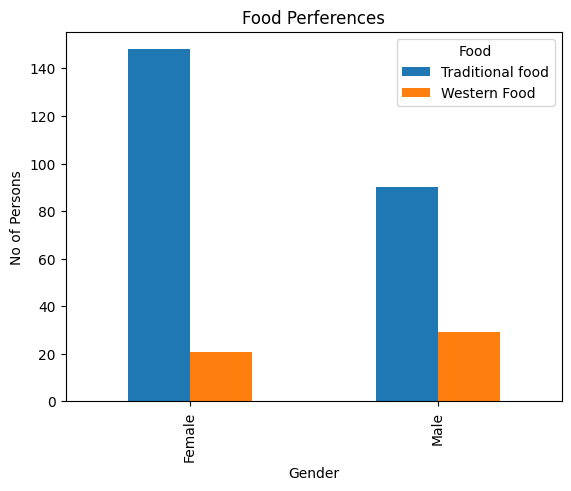

In [ ]:
mffood = data.groupby('Gender')['Food'].value_counts().unstack()
mffood.plot(kind='bar',xlabel='Gender',ylabel='No of Persons',title='Food Perferences')

#Based on drinks preferred

<Axes: xlabel='Types of Drinks', ylabel='No of People'>

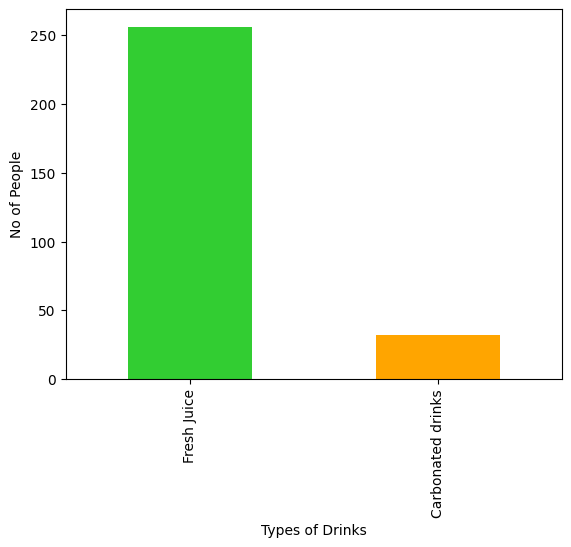

In [ ]:
jd=data['Juice'].value_counts()
jd.plot(kind='bar',ylabel='No of People',xlabel='Types of Drinks',color=['limegreen','Orange'])

# Based On Desserts

Maybe    122
Yes      114
No        52
Name: Dessert, dtype: int64


<Axes: title={'center': 'Preferences for Deserts'}>

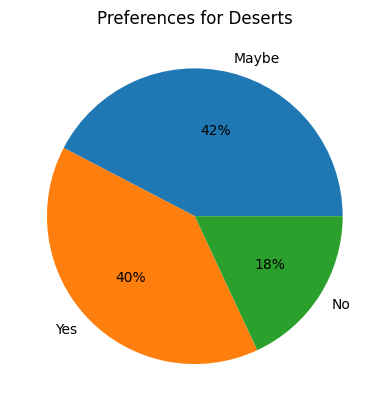

In [ ]:
dest=data['Dessert'].value_counts()
print(dest)
dest.plot(kind='pie',title='Preferences for Deserts',autopct='%1.0f%%',ylabel='')


#Based Each Day's Visits

<Axes: xlabel='No of Persons', ylabel='Date'>

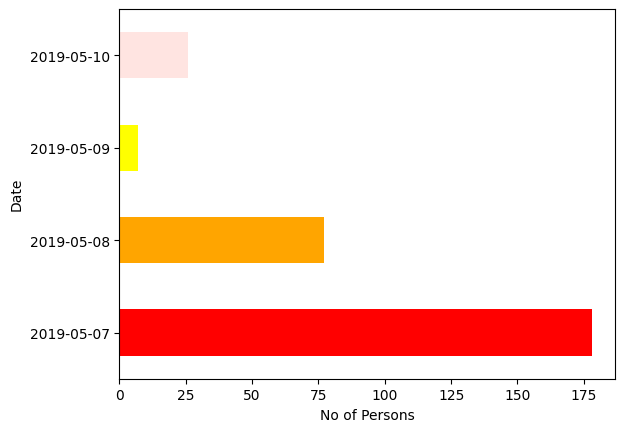

In [ ]:
data['Timestamp'] = pd.to_datetime(data.Timestamp)
data['date'] = pd.Series(data.Timestamp).dt.date
Day_counts = data['date'].value_counts()
Day_counts.sort_index(axis=0).plot(kind='barh',ylabel='Date',xlabel='No of Persons',color=['red','orange','yellow','mistyrose'])


# For knowing the Age of people on Survey

<Axes: ylabel='Frequency'>

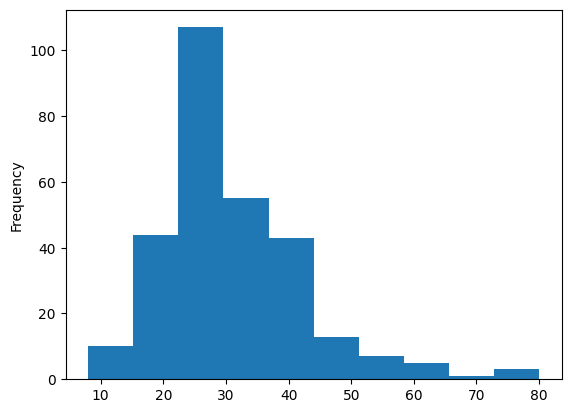

In [ ]:
data.Age.plot(kind='hist')

<Axes: xlabel='Age'>

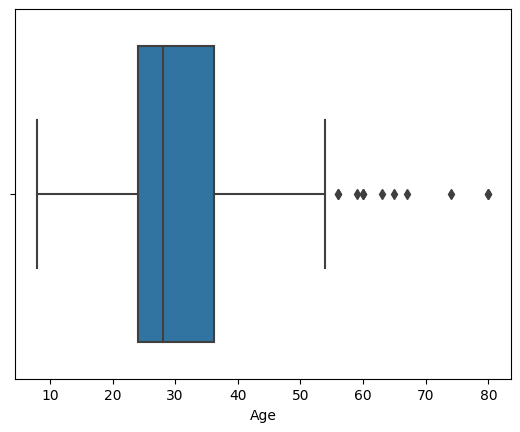

In [ ]:
sns.boxplot(x=data['Age'])

#Detailed Info on survey people

In [ ]:
ft=data.drop(['Timestamp','Age','Dessert','Food','Juice'],axis=1)
grp= ft.sort_index(axis=1).groupby(['date','Gender','Nationality']).count()
grp.rename(columns={'Participant_ID':''})

date       Gender Nationality    
2019-05-07 Female Algerian      1
                  Chinese       1
                  Indian       76
                  Maldivian     2
                  Mauritian     1
                  Nigerian      1
                  indonesian    3
                  japanese      1
                  malaysian     5
                  pakistani     1
                  unknown       1
           Male   Canadian      1
                  Indian       55
                  Korean        1
                  Maldivian     1
                  Seychellois   1
                  Tanzanian     1
                  Yemeni        1
                  indonesian    7
                  japanese      1
                  malaysian    11
                  pakistani     5
2019-05-08 Female Indian       67
           Male   Indian       10
2019-05-09 Female Indian        6
           Male   Indian        1
2019-05-10 Female Indian        3
           Male   Indian       23